<a href="https://colab.research.google.com/github/tamojeetroychowdhury/Spectral-Analysis/blob/main/SS_47Tucanae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install astropy>=5.1
!pip install specutils
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.5/194.5 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.4/414.4 KB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.6/195.6 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
from astropy.io import fits
from astropy.convolution import convolve, Box1DKernel
import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle, BoxLeastSquares
from scipy.optimize import curve_fit
#plt.style.use('dark_background')

In [2]:
from astroquery.sdss import SDSS
from specutils import Spectrum1D
from astropy import coordinates as coords
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

import warnings
warnings.simplefilter('ignore')
from scipy.signal import find_peaks
from specutils.fitting import fit_generic_continuum

from specutils.manipulation import gaussian_smooth
from specutils import SpectralRegion
from specutils.analysis import equivalent_width, line_flux

444 451
344 356


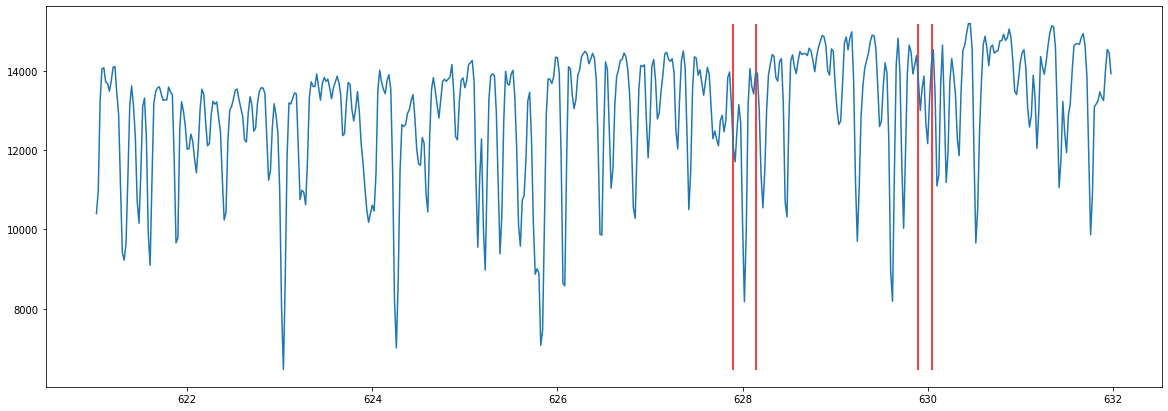

444 451
344 356


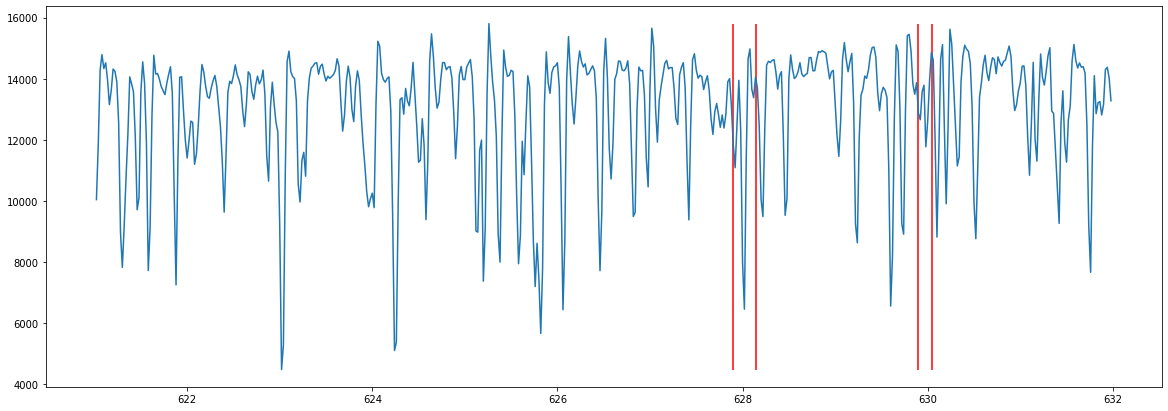

444 451
344 356


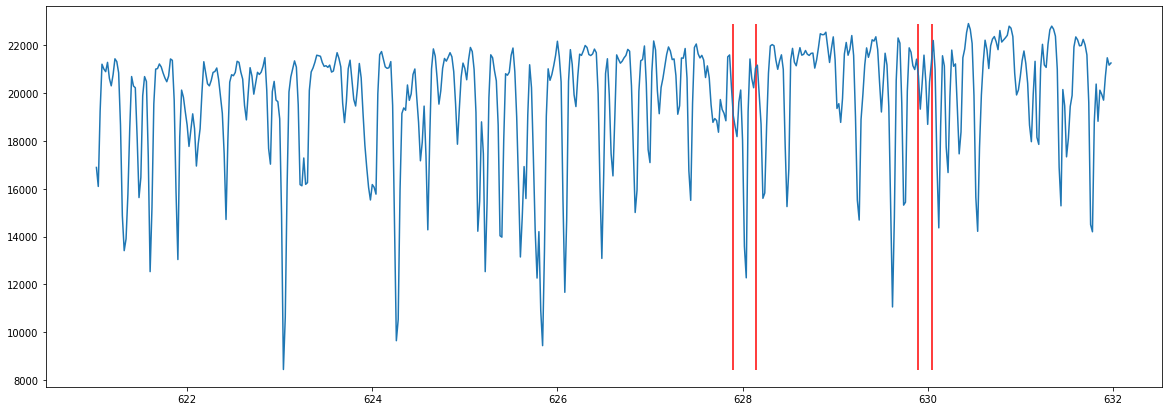

444 451
344 356


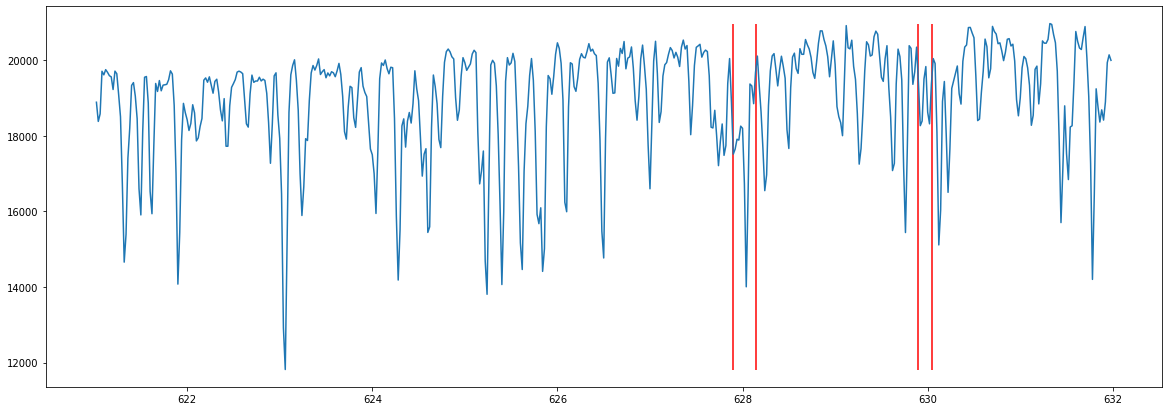

444 451
344 356


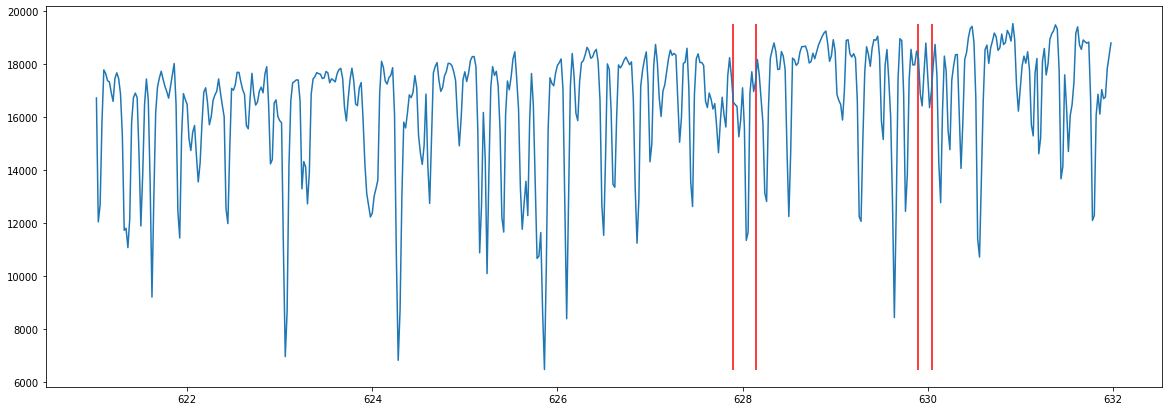

444 451
344 356


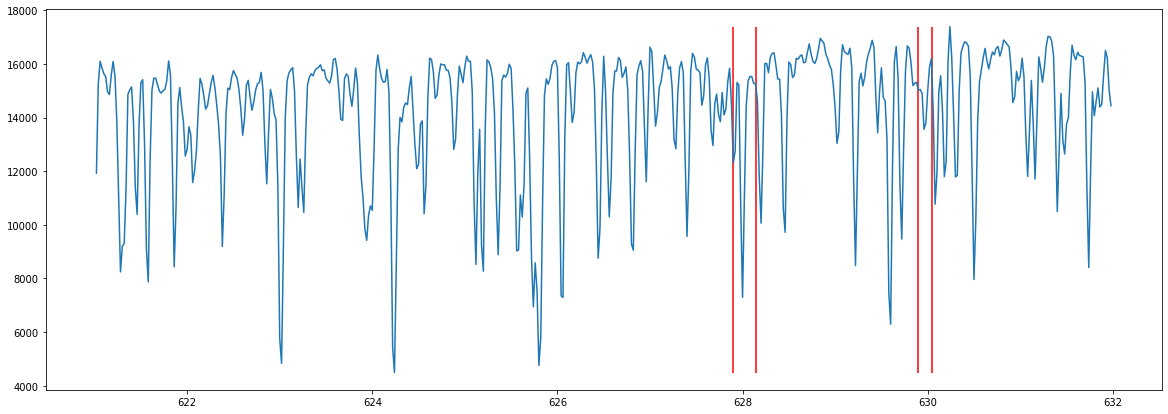

444 451
344 356


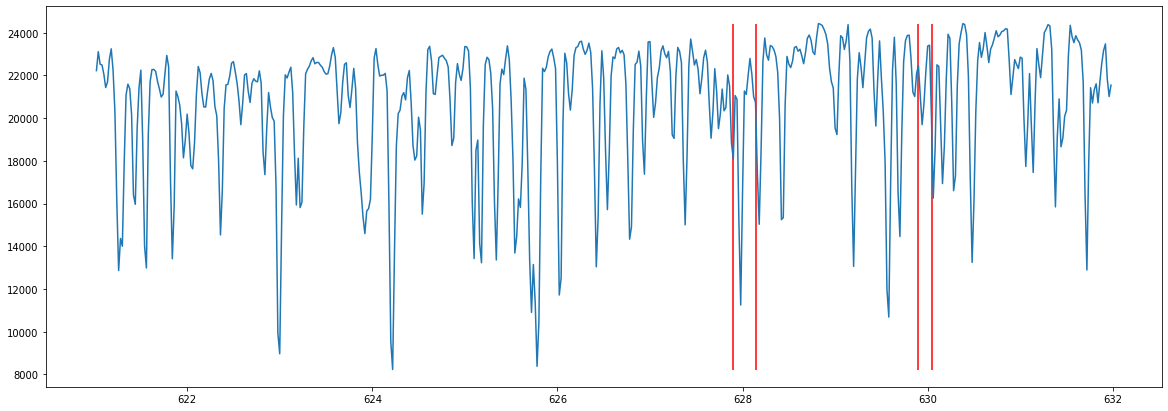

444 451
344 356


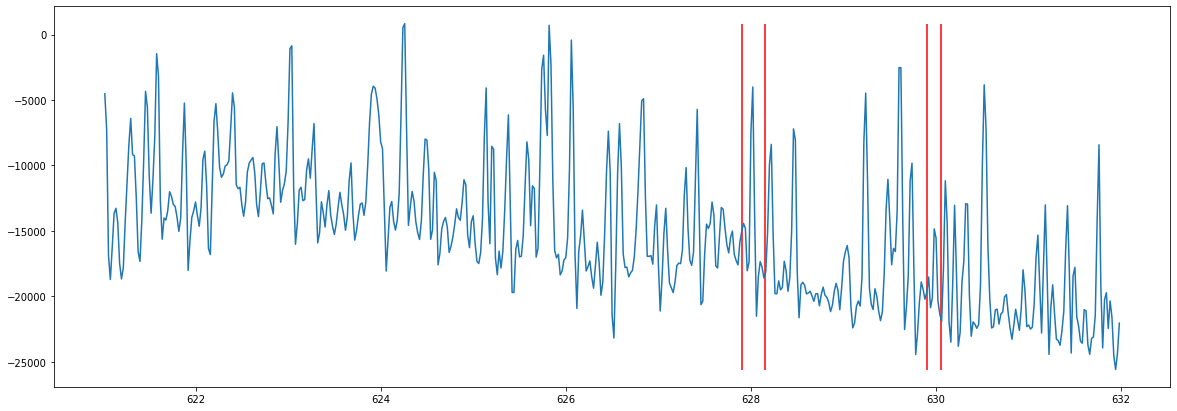

444 451
344 356


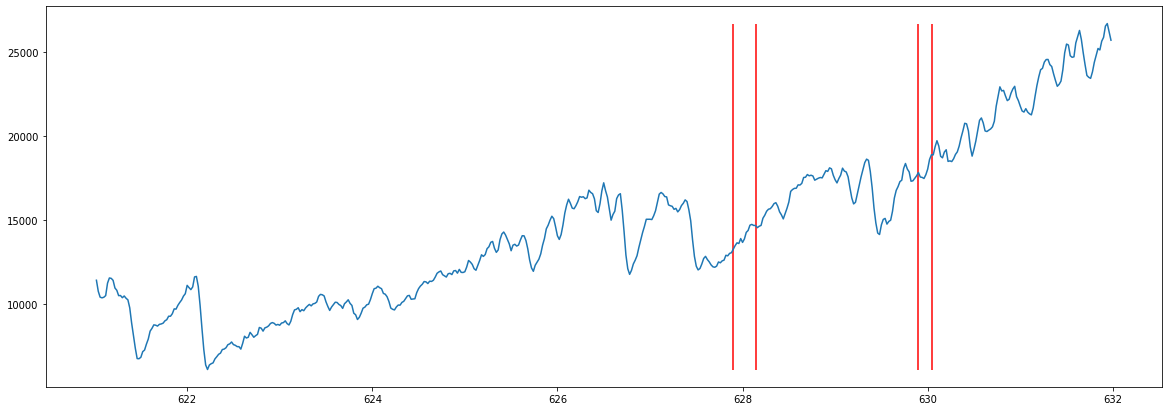

444 451
344 356


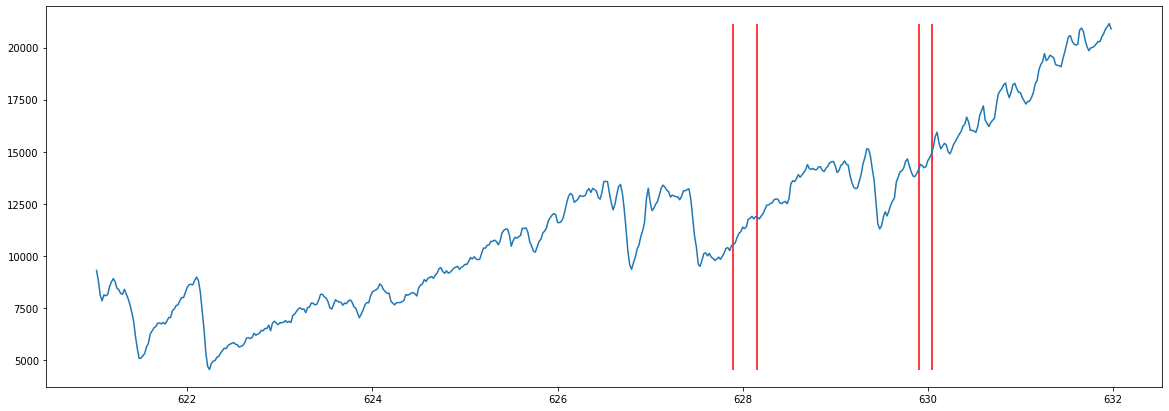

444 451
344 356


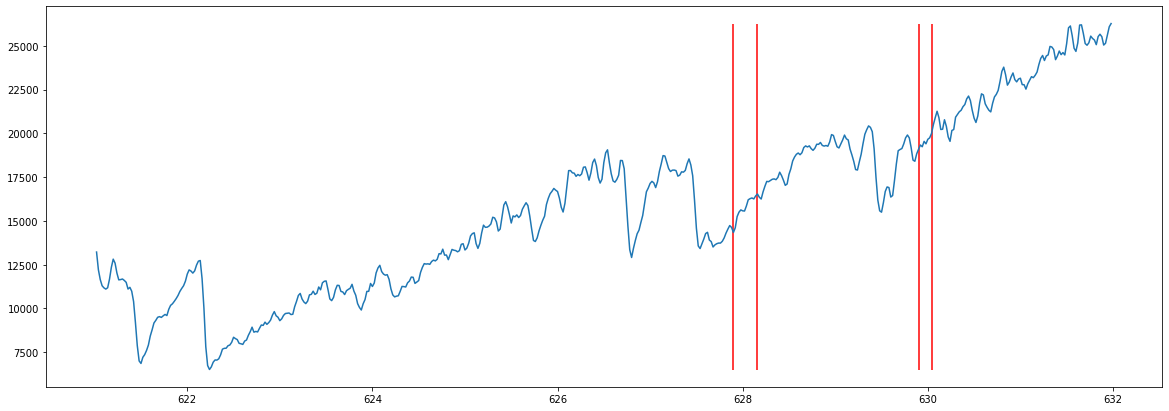

444 451
344 356


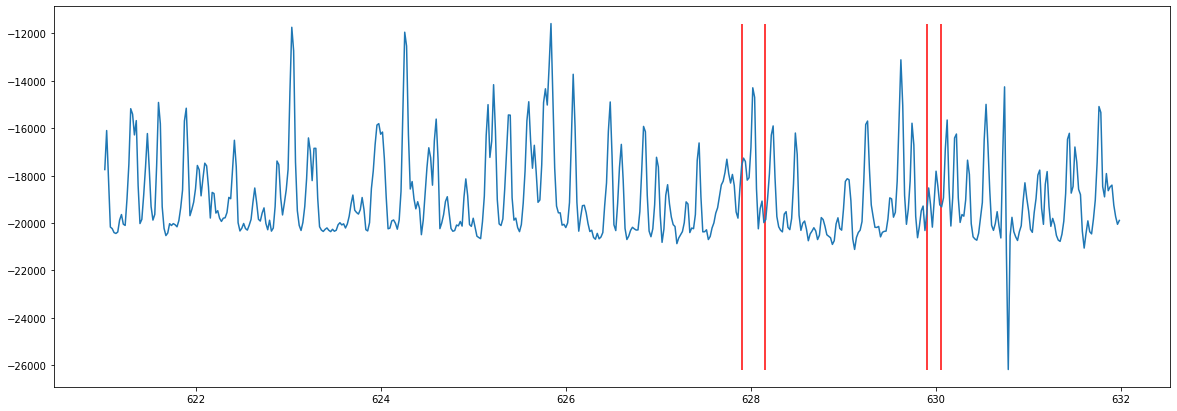

444 451
344 356


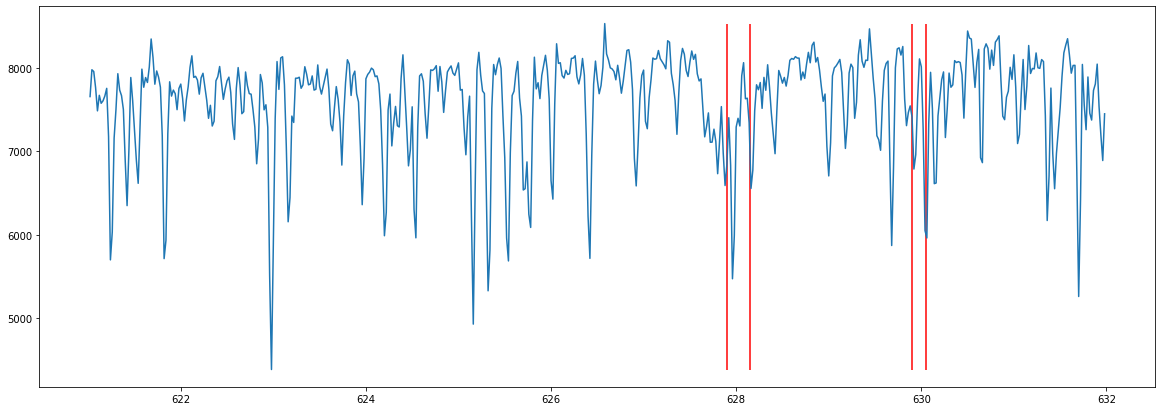

444 451
344 356


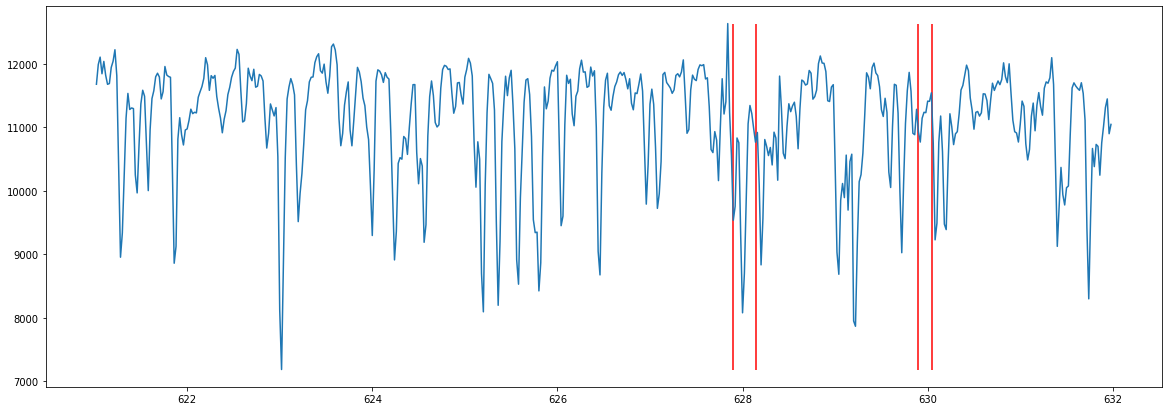

444 451
344 356


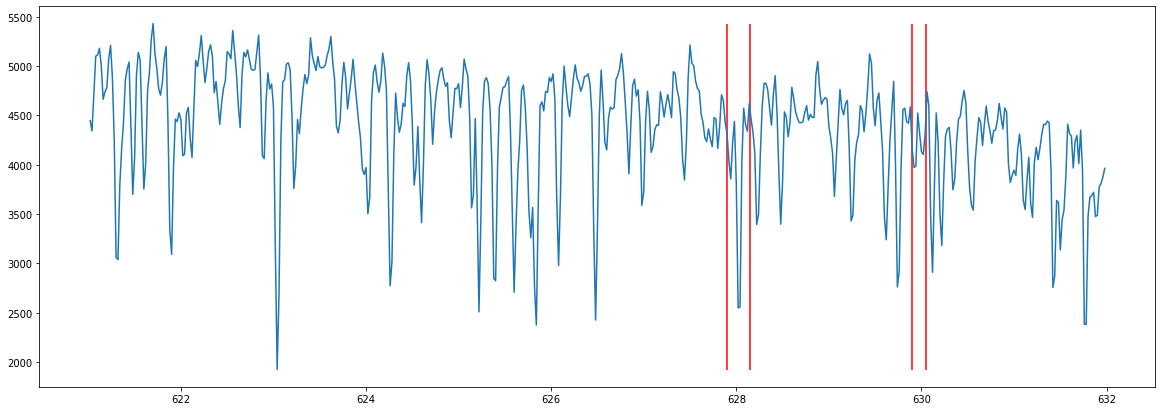

444 451
344 356


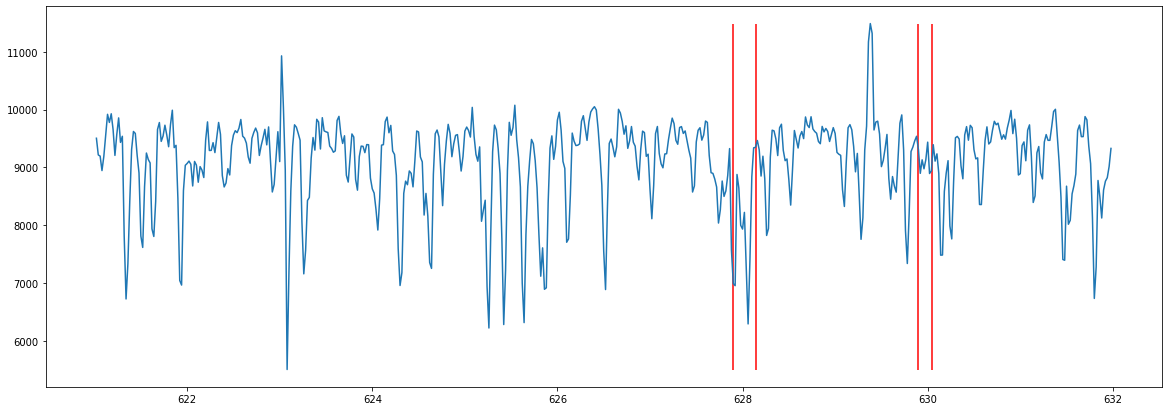

444 451
344 356


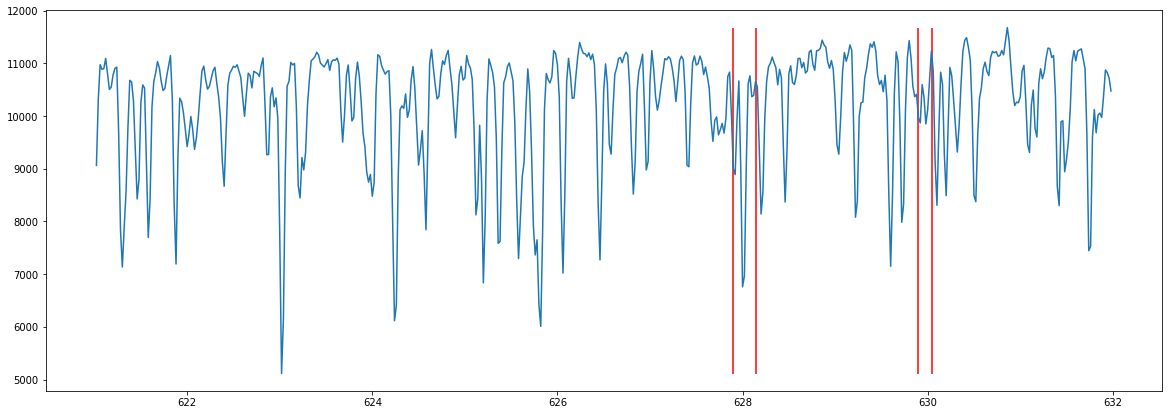

444 451
344 356


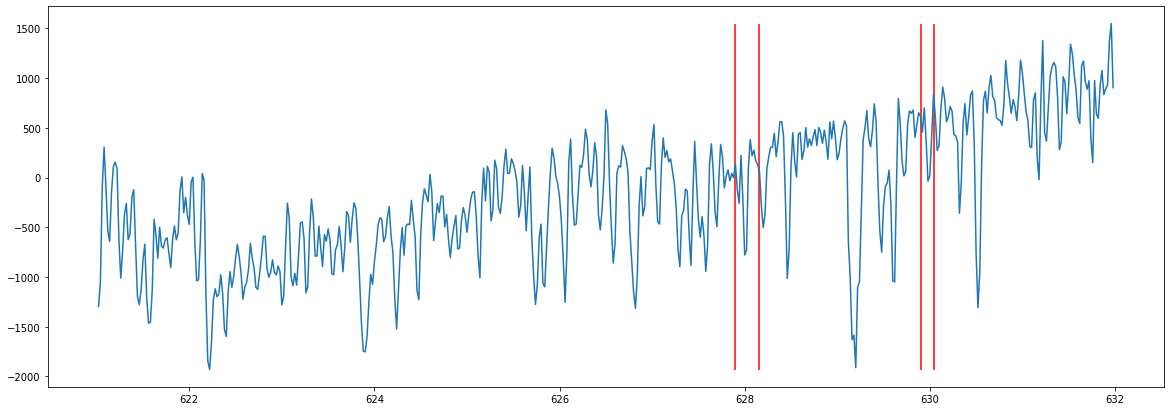

444 451
344 356


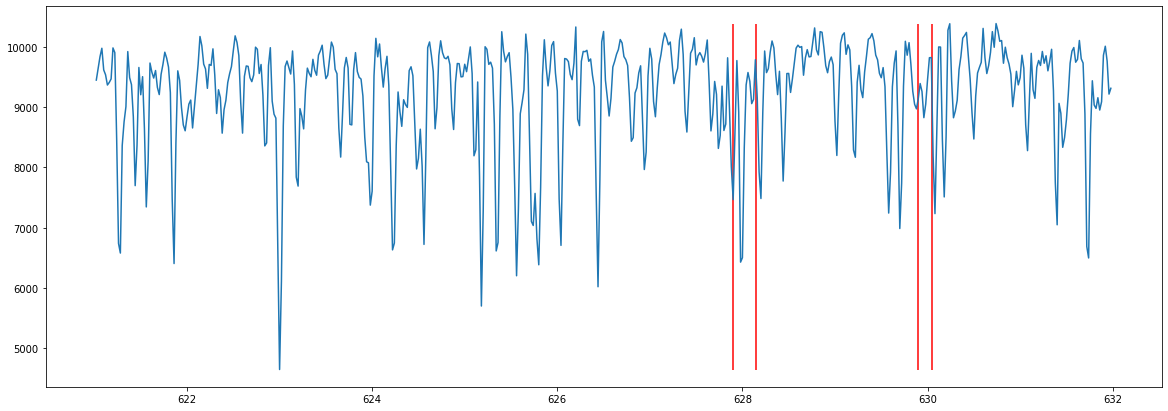

444 451
344 356


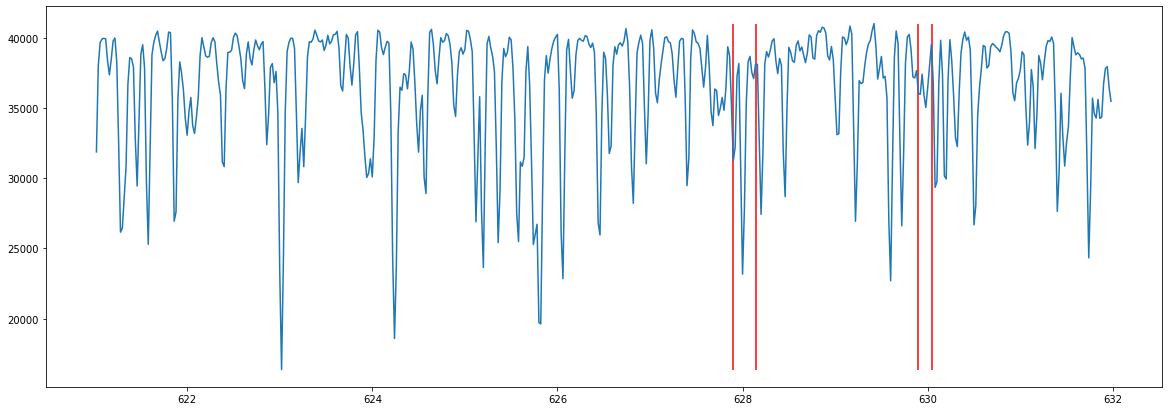

444 451
344 356


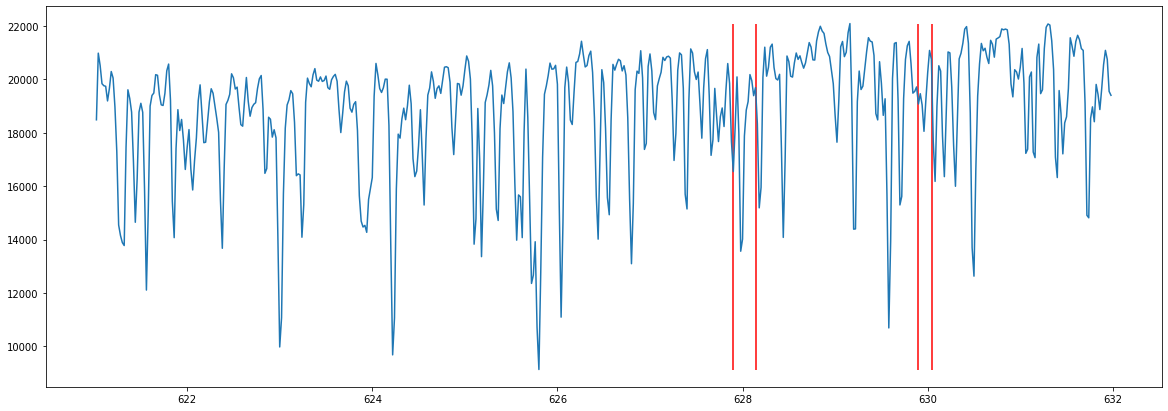

444 451
344 356


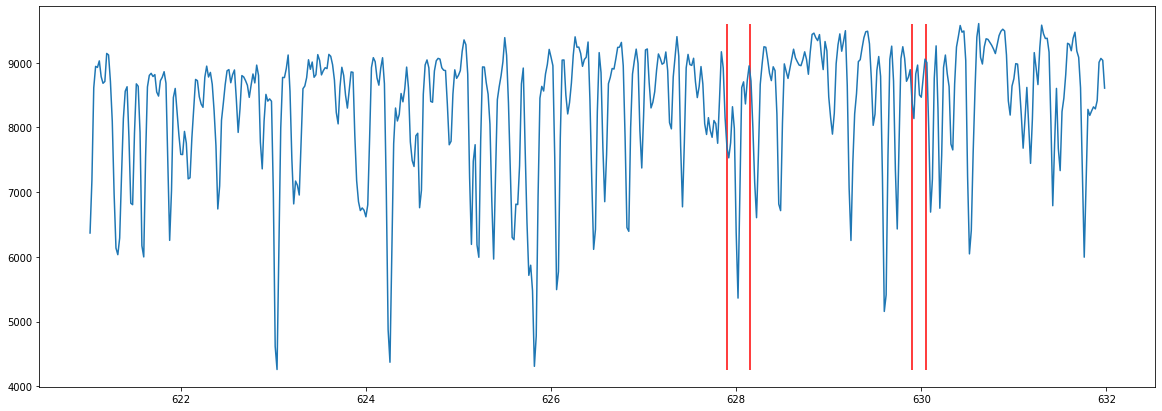

444 451
344 356


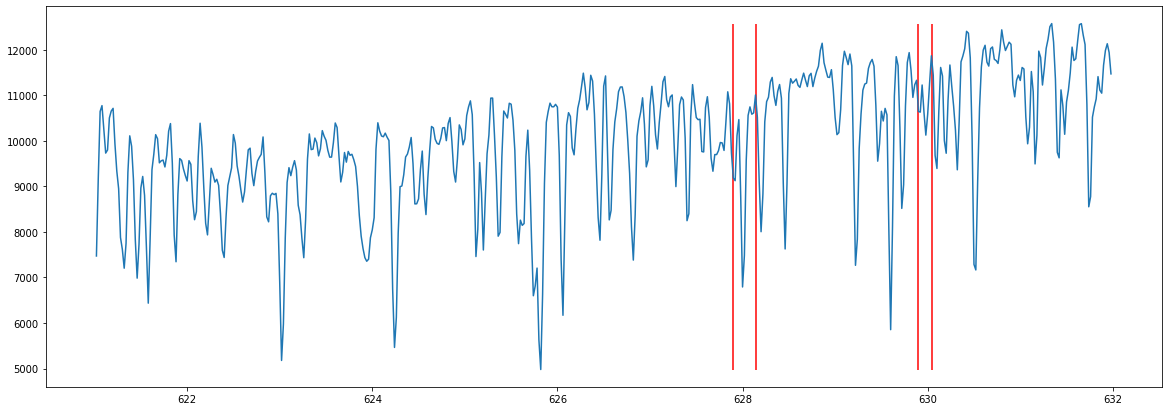

444 451
344 356


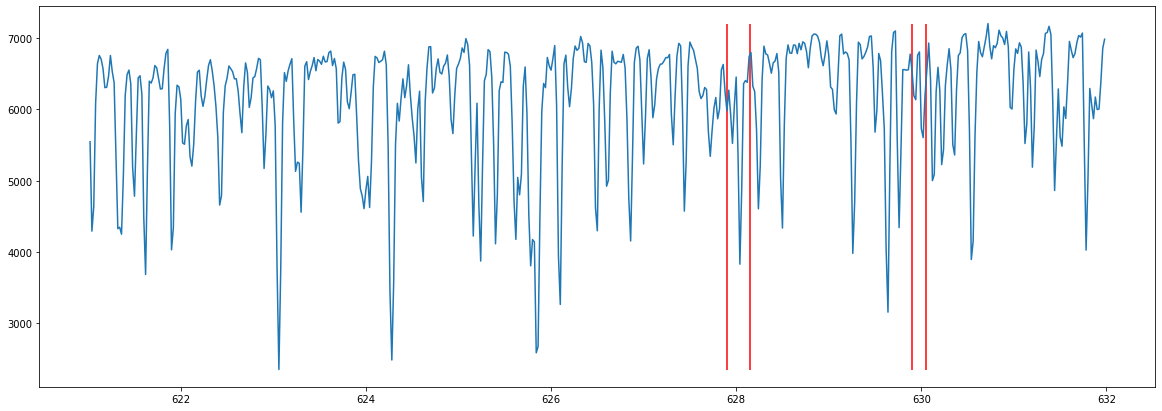

444 451
344 356


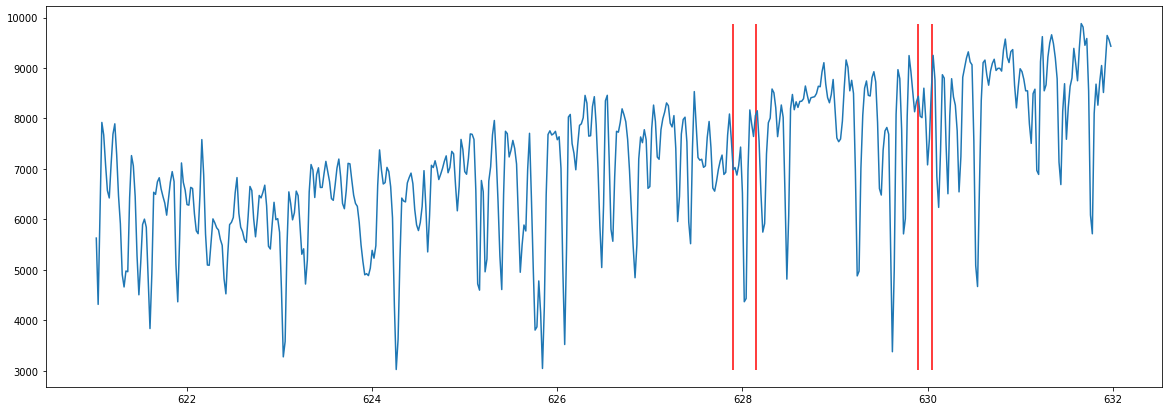

444 451
344 356


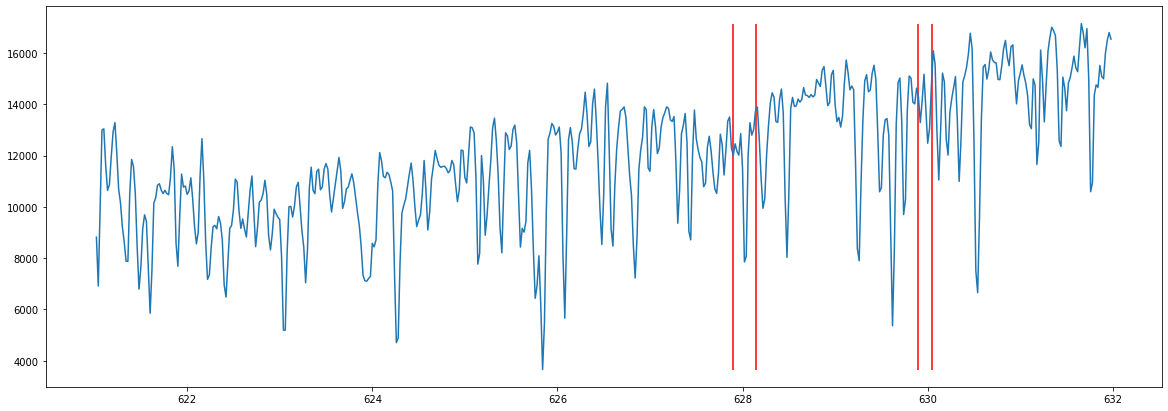

444 451
344 356


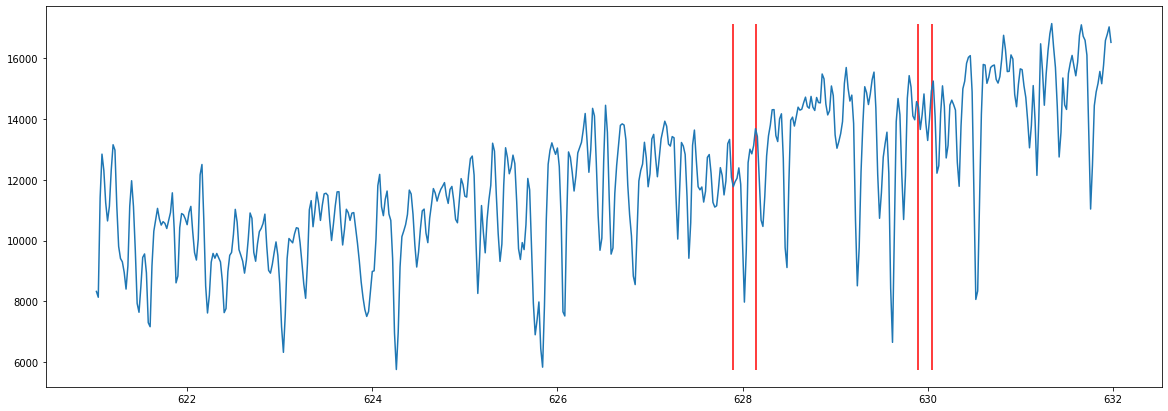

In [159]:
fe = []
o = []

for i in range(1,29):
  f = fits.open(f'gdrive/My Drive/SS/47/2 ({i}).fits')
  d = f[1].data
  l = d['WAVE'][0][np.where(d['WAVE'][0] > 621)]
  f = d['FLUX_REDUCED'][0][np.where(d['WAVE'][0] > 621)]

  l = l[np.where(l<632)]
  f = f[np.where(l<632)]

  spec = Spectrum1D(spectral_axis=l*u.nm, flux=f*u.Jy)

  try:
    g1_fit = fit_generic_continuum(spec)
  except:
    continue
  y_continuum_fitted = g1_fit(l * u.AA)

  #spec -= y_continuum_fitted
  #spec = gaussian_smooth(spec, stddev=4)

  o.append(find_flux(629.9, 630.05, l, f))
  #na.append(line_flux(spectrum = spec, regions = SpectralRegion(5896*u.AA, 5900*u.AA)))
  fe.append(find_flux(627.9, 628.15, l, f))
  #print(i)
  plt.figure(figsize=(20,7))
  plt.plot(spec.spectral_axis, spec.flux)#,s=1)
  #s = d['FLUX'][0]
  plt.vlines(np.array([6299,6300.5,6279,6281.5])/10,np.max(np.array(spec.flux)),np.min(np.array(spec.flux)),colors='r')
  #plt.ylim(-1e-13,1e-13)
  #plt.xlim(628,632)
  plt.show()

In [146]:
fe

[17976.175851004467,
 23959.08157784598,
 25772.37109375,
 19496.63169642858,
 18718.918526785725,
 23656.4619140625,
 29464.957066127223,
 40861.51000976561,
 15858.464913504467,
 13153.619698660717,
 17552.52608816963,
 22030.46888950892,
 7403.532156808033,
 12054.545741489954,
 6176.28981236049,
 14887.407863071981,
 14080.950762067518,
 3527.9866485255106,
 11311.99667794364,
 47025.05276925223,
 22080.623971121655,
 10955.658194405689,
 12917.39336286272,
 7156.986886160714,
 11632.571672712053,
 15355.554016113281,
 16139.70615931919]

In [156]:
h

[88212.44996744792,
 93402.24047851562,
 138215.330867513,
 131924.537109375,
 119720.7553873698,
 118032.22180786132,
 146669.79390462235,
 234793.4876586914,
 252054.53157552087,
 130733.28720703126,
 94404.59179687503,
 115964.41609700519,
 50094.28260091145,
 62760.683146158844,
 33652.352777099615,
 58342.441365559884,
 64504.64331054688,
 23214.415399042766,
 59457.56982421875,
 238255.83251953128,
 135956.46745605467,
 57147.95951944987,
 74280.41812337236,
 45214.20751953124,
 69428.50671386719,
 127534.68377278643,
 111852.5537923177]

In [165]:
def find_flux(lower, upper, lamb, fluxes):
  first = np.where(lamb >= lower)[0][0]
  last = np.where(lamb <= upper)[-1][-1]
  print(first, last)
  sum = 0.01
  background = np.mean(fluxes[first-50:last+50])
  for i in range(first, last):
    sum += np.abs(fluxes[i] - background)
  return sum

In [173]:
h = []

for i in range(1,29):
  f = fits.open(f'gdrive/My Drive/SS/47/2 ({i}).fits')
  d = f[1].data
  l = d['WAVE'][0][np.where(d['WAVE'][0] > 640)]
  f = d['FLUX_REDUCED'][0][np.where(d['WAVE'][0] > 640)]

  l = l[np.where(l<670)]
  f = f[np.where(l<670)]

  spec = Spectrum1D(spectral_axis=l*u.nm, flux=f*u.Jy)

  try:
    g1_fit = fit_generic_continuum(spec)
  except:
    continue
  y_continuum_fitted = g1_fit(l * u.AA)

  #spec -= y_continuum_fitted
  #spec = gaussian_smooth(spec, stddev=4)

  h.append(find_flux(656.0, 656.4, l, f))
  #na.append(line_flux(spectrum = spec, regions = SpectralRegion(5896*u.AA, 5900*u.AA)))
  #fe.append(line_flux(spectrum = spec, regions = SpectralRegion(6278*u.AA, 6285*u.AA)))
  #print(i)
  #plt.figure(figsize=(20,7))
  #plt.plot(spec.spectral_axis, spec.flux)#,s=1)
  #s = d['FLUX'][0]
  #plt.vlines(np.array([6560,6564])/10,np.max(np.array(spec.flux)),np.min(np.array(spec.flux)),colors='r')
  #plt.ylim(-1e-13,1e-13)
  #plt.xlim(628,632)
  #plt.show()

799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819
799 819


In [174]:
len(h)

27

In [176]:
na = []

for i in range(1,29):
  f = fits.open(f'gdrive/My Drive/SS/47/2 ({i}).fits')
  d = f[1].data
  l = d['WAVE'][0][np.where(d['WAVE'][0] > 580)]
  f = d['FLUX_REDUCED'][0][np.where(d['WAVE'][0] > 580)]

  l = l[np.where(l<600)]
  f = f[np.where(l<600)]

  spec = Spectrum1D(spectral_axis=l*u.nm, flux=f*u.Jy)

  try:
    g1_fit = fit_generic_continuum(spec)
  except:
    continue
  y_continuum_fitted = g1_fit(l * u.AA)

  #spec -= y_continuum_fitted
  #spec = gaussian_smooth(spec, stddev=4)

  try:
    na.append(find_flux(589.4,589.65, l, f))
  except:
    continue
  #na.append(line_flux(spectrum = spec, regions = SpectralRegion(5896*u.AA, 5900*u.AA)))
  #fe.append(line_flux(spectrum = spec, regions = SpectralRegion(6278*u.AA, 6285*u.AA)))
  #print(i)
  #plt.figure(figsize=(20,7))
  #plt.plot(spec.spectral_axis, spec.flux)#,s=1)
  #s = d['FLUX'][0]
  #plt.vlines(np.array([5894,5896.5])/10,np.max(np.array(spec.flux)),np.min(np.array(spec.flux)),colors='r')
  #plt.ylim(-1e-13,1e-13)
  #plt.xlim(628,632)
  #plt.show()

469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481
469 481


In [171]:
len(na)

28

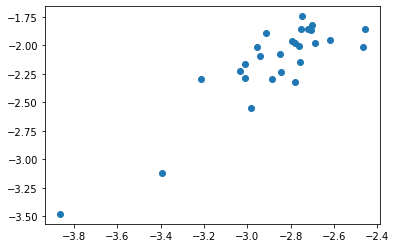

In [181]:
fe = np.array(fe)
h = np.array(h)
o = np.array(o)
na = np.array(na)
feh = np.log(fe/3/h)
oh = np.log(o/3/h)
nah = np.log(na/3/h)
plt.scatter(feh,nah)

In [182]:
np.corrcoef([feh,oh,nah])

array([[1.        , 0.1223499 , 0.87076473],
       [0.1223499 , 1.        , 0.08293518],
       [0.87076473, 0.08293518, 1.        ]])

In [186]:
tio = []
#ca = []

for i in range(1,29):
  f = fits.open(f'gdrive/My Drive/SS/47/2 ({i}).fits')
  d = f[1].data
  l = d['WAVE'][0][np.where(d['WAVE'][0] > 670)]
  f = d['FLUX_REDUCED'][0][np.where(d['WAVE'][0] > 670)]

  l = l[np.where(l<690)]
  f = f[np.where(l<690)]

  spec = Spectrum1D(spectral_axis=l*u.nm, flux=f*u.Jy)

  try:
    g1_fit = fit_generic_continuum(spec)
  except:
    continue
  y_continuum_fitted = g1_fit(l * u.AA)

  #spec -= y_continuum_fitted
  #spec = gaussian_smooth(spec, stddev=4)

  tio.append(find_flux(686.7,688, l, f))
  #na.append(line_flux(spectrum = spec, regions = SpectralRegion(5896*u.AA, 5900*u.AA)))
  #fe.append(line_flux(spectrum = spec, regions = SpectralRegion(6278*u.AA, 6285*u.AA)))
  #print(i)
  #plt.figure(figsize=(20,7))
  #plt.plot(spec.spectral_axis, spec.flux)#,s=1)
  #s = d['FLUX'][0]
  #plt.vlines(np.array([6867,6880])/10,np.max(np.array(spec.flux)),np.min(np.array(spec.flux)),colors='r')
  #plt.ylim(-1e-13,1e-13)
  #plt.xlim(628,632)
  #plt.show()

835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899
835 899


In [187]:
tio

[223578.6853167872,
 210755.7999199696,
 362747.3834279724,
 328627.191640625,
 336414.7485908919,
 263759.30370712635,
 363784.6245674542,
 359956.9622496666,
 383025.6709899012,
 300346.3280259147,
 356660.6934984758,
 278656.82622761047,
 128147.13644102516,
 134708.44127143666,
 55484.66184504808,
 128394.56049542679,
 163796.10267816318,
 27819.837065816744,
 145621.48651486274,
 552834.5805030486,
 329334.86010956566,
 142377.07664443602,
 200630.0390467796,
 107559.5187414253,
 155831.76680020962,
 284710.2057412349,
 293290.00025819335]